### PythonTricks


## 1.string interning

In [1]:
a="a_b"
b="a"+"_"+"b"
print(id(a)==id(b))

True


In [2]:
a=a+"!"
b=b+"!"
print(id(a) is id(b))

False


In [3]:
a=''.join(['f','o','o'])
b=''.join(['f','o','o'])
a is  b

False

Such behavior is due to Cython optimization called **`string interning`** that tries to use the existing immutable objects rather than creating a new object to save memory.
- all length 0 and 1 string are interned
- strings will be interned at compile time instead of run time 
- strings that are not composed of ASCII letters ,digits or underscores are not interned
> by the way **the different of 'id' and '=='**<br>
'id' checks if both the operands refer to the same object .it is for reference equality<br>
'==' compares the values of both the operands and checks if they are the same. it is for the value equality
------------------
这是因为Cpython优化的**字符串驻留**机制,其尝试使用已存在的不可变变量而非新建一个变量
- 只有长度为0或1的字符会被驻留
- 字符串驻留会在编译期发生即替换结果而非运行时
- 字符串中字母、数字、下划线不会被驻留
> 顺便提及‘id’ 和‘==’的区别  
‘id’判断地址 ‘==’判断值

## 2.peephole optimization  constant floding  small_ints cache

In [4]:
import dis
def foo():
    return 'foo'+'bar'
dis.dis(foo)

  3           0 LOAD_CONST               3 ('foobar')
              2 RETURN_VALUE


In [5]:
a='a'*20
b='a'*21
a is b

False

In [6]:
a,b=257,257
print(a==b)
print(a is b)
print(id(a)==id(b))
a=257
b=257
print(a==b)
print(a is b)
print(id(a)==id(b))

True
True
True
True
False
False


- source code will be transformed to **`raw byte code`** first than transformed to 'more efficient byte code ' via peephole optimization  
- **`constant folding`** only occurs strings having length less than 20 (wont let **`.pyc`** to large) to reduce few clock cycles during runtime  
- python will cache the frequency number to a list named **`small_ints`** just for **`[-5,256]`**  
' = ' assigning operator in the same line will allocate same memory if just one value for multi-variances 
-----------
- python源码会先被编译成原始字节码进而再通过peephole优化编译成更加高效的字节码
- **字符串折叠** 仅仅发生在字符串长度不超过20的前提下(否则会使pyc文件过大),以在运行期减少时间周期
- python会缓存常用整数 范围仅(-5,256)
- 同行赋值同值同地址

## 3.dict K&V

In [7]:
dict1={}
dict1[1]='1'
dict1[1.0]='2'
dict1[1.1]='3'
print(dict1[1])
print(dict1[1.0])
print(dict1[1.1])

2
2
3


In [8]:
hash(1.0) is hash(1)

True

python dict check for equality and compare `hash(key)` to determinate if two keys have same value  

----------------
python 字典会根据`key`的hash值来确定是否是同一个key且在python中不可变变量同值同地址

## 4.immutable ＆ mutable reference

In [9]:
b=1
print(id(b))
b=2
print(id(b))
c=1
print(id(c))
a=[1,2]
c=[a]*3
print(c,' ',id(c[0]),' ',id(a[0]))
a[0]=3
print(c,' ',id(c[0]),' ',id(a[0]))

4499363168
4499363200
4499363168
[[1, 2], [1, 2], [1, 2]]   4538751496   4499363168
[[3, 2], [3, 2], [3, 2]]   4538751496   4499363232


immutable varience will give certain memory by value and this memory cant be changed just can turn to other memory<br>
mutable varience will give certain memory and the deeply immutable varience in this are same as below  

---------------------------------------
h不可变变量根据值分配内存地址若更改即更改其指向
可变变量分配内存地址后不变,子不可变变量法则如上

## 5. declare & runtime

In [10]:
array=[1,8,15]
g=(i for i in array if array.count(i)>0)
array=[2,8,22]
print(list(g))
array=[1,8,15]
g=[i for i in array if array.count(i)>0]
array=[2,8,22]
print(g)

[8]
[1, 8, 15]


In　a **`generator`** expression __`in`__ is declareation time to determinate some constant or others, but the __`if`__ conditional clause is evaluated at runtime  
SO first **x** is determined in compile time by '1,8,15' second **x** will determined in runtime  
And second line express a generator it wont excute right away  
When call **list()** to excute generator **array** is changed to '2,8,22' 

--------------------------------------------------

在生成器表达式中`in`关键字是在编译期决定`x`的值，而`if`则是在运行期决定array的值
所以在for中的x为[1,8,15]

## 6. def in loop

In [11]:
funcs = []
results = []
for x in range(7):
    def some_func():
        return x
    funcs.append(some_func)
    results.append(some_func())
funcs_results = [func() for func in funcs]
print(results,'\n',funcs_results)

[0, 1, 2, 3, 4, 5, 6] 
 [6, 6, 6, 6, 6, 6, 6]


In [12]:
func=[lambda x: x**i for i in range(7)]
[f(2) for f in func]

[64, 64, 64, 64, 64, 64, 64]

when defining a function inside a loop which uses variables in its body, the loop function is bound to the variable's memory not the value. So all of the functions use the latest value assigned to the variable for computation

-----------------------------
循环内部定义的函数使用的变量的话，函数绑定其指针而非地址，且该例中多个不同的函数绑定的是同一个x变量的地址  
所以调用时的x都是最新的x值

## 7. Backlashes & raw string

In [13]:
print("\\ C:\\")
print(r"\ C:")
print(r"\ C:\\")
print(r'\ C\\\:\")


SyntaxError: EOL while scanning string literal (<ipython-input-13-cf5478249089>, line 4)

> Even in a raw literal, quotes can be escaped with a backslash, but the
backslash remains in the result; for example, r"\"" is a valid string
literal consisting of two characters: a backslash and a double quote; r"\"
is not a valid string literal (even a raw string cannot end in an odd number of
backslashes).  Specifically, a raw literal cannot end in a single backslash
(since the backslash would escape the following quote character).  Note also
that a single backslash followed by a newline is interpreted as those two
characters as part of the literal, not as a line continuation

----------
+ raw字符串仍然按照有转义的方式解析，但所有应当转义的字符都转义成了`反斜杠 + 被转义字符`，也就是说和转义前保持不变.
+ 但是仅有一个地方不一样，就是引号、回车的转义。若raw string中以奇数个转义字符，那么最后一个转义字符就会转义最后一个结束引号。

```python
'abc\
def' # 'abcdef'
```

```py
r'abc\
def' # 'abc\\\ndef'
```

## 8. apply & reduce & map & filter

In [14]:
import operator
import itertools
from functools import reduce
a=[1,2,3,4,5]
def func(*,a=1,b=1):
    print(a,b)
func(**{'a':2})
b=list(map(lambda x:x+3,a))
c=list(filter(lambda x:x>2,a))
d=reduce(lambda x,y:x+y,a)
e=(reduce(operator.pow,[2,3,4]))
res=list(itertools.zip_longest(a,[1]))
res1=list(zip(*[iter(a)]*2))
print(b,c,d,e,res,res1)

2 1
[4, 5, 6, 7, 8] [3, 4, 5] 15 4096 [(1, 1), (2, None), (3, None), (4, None), (5, None)] [(1, 2), (3, 4)]


+ python 3  ：Instead of apply(f, args) use f(*args). unpacking is importanr 
Replace this:  
w = apply(OptionMenu, (master, option) + tuple(movieList))  
with this:  
w = OptionMenu(*(master, option) + tuple(movieList))
+ `zip` just gets the shortest length for result . itertools.zip_longest gets the longest
+ `reduce` moved to functools
+  `zip(*zip(a,a))` can unpack the `zip`
-----------------------
+ python3 不在有`apply`内置函数，官方文档说明直接使用unpacking的方式在函数中调用即可
+ `zip` 默认取最短的为边界 超出截断。 有需求可使用`itertools.zip_longest` 以最长长度为边界 不足补`None`
+ `reduce` 移到了`functools`中 手动import
+ `zip(*zip(a,a))` 可以对里层zip拆箱 

### 9. Class variable

In [15]:
class SomeClass:
    some_var = 15
    some_list = [5]
    another_list = [5]
    def __init__(self, x): 
        self.some_var = x + 1
        print(id(self.some_list))
        self.some_list = self.some_list + [x]
        print(id(self.some_list))
        print(id(self.another_list))
        self.another_list += [x]
        print(id(self.another_list))
s=SomeClass(420)
print(s.some_list)
print(s.another_list)
ss=SomeClass(111)
print(ss.some_list)
print(ss.another_list)
print(ss.another_list==s.another_list)
print(ss.some_list==s.some_list)
print(ss.some_var==s.some_var)

4538750152
4538770632
4538751560
4538751560
[5, 420]
[5, 420]
4538750152
4539060296
4538751560
4538751560
[5, 111]
[5, 420, 111]
True
False
False


+ Class variables and variables in class instances are internally handled as dictionaries of a class object. If a variable name is not found in the dictionary of the current class, the parent classes are searched for it. 
+ The  +=  operator modifies the mutable object in-place without creating a new object. So changing the attribute of one instance affects the other instances and the class attribute as well.
---------------------
+ 类变量和实例变量经内部处理为类的字典，若在当前类的字典中找不到则去其父类的字典寻找
+ `+=` 操作符会调整可变对象的内部值而非创建一个新的对象。所以改变一个实例的属性会影响其他类的属性

### 10. immutable sequences

In [16]:
some_tuple=('a','tuple','with','value')
other_tuple=([1,2],[3,4],[5,6])
#some_tuple[2]='111'
try:
    other_tuple[2].append(2)
except Exception as e:
    raise e
print(other_tuple)
other_tuple[2]+=[2]


([1, 2], [3, 4], [5, 6, 2])


TypeError: 'tuple' object does not support item assignment

In [17]:
print(other_tuple)

([1, 2], [3, 4], [5, 6, 2, 2])


+ An object of an immutable sequence type cannot change once it is created. (If the object contains references to other objects, these other objects may be mutable and may be modified; however, the collection of objects directly referenced by an immutable object cannot change.)
+ +=  operator changes the list in-place. The item assignment doesn't work, but when the exception occurs, the item has already been changed in place
--------------
+ 不可变序列类型一旦创建则不可改变。如果引用了其他可变对象，这些可变对象的直接引用的集合不可改变
+ `+=` 操作符直接修改列表，对象赋值不起作用但是当抛出异常时对象已经被修改了

### 11.try-finally

In [18]:
e="variable"
try:
    raise Exception()
except Exception as e:
    pass
print(e)

NameError: name 'e' is not defined

```python
except Exception as e:
try:
    foo
finally:
    del e
```


This means the exception must be assigned to a different name to be able to refer to it after the except clause. Exceptions are cleared because, with the traceback attached to them, they form a reference cycle w ith the stack frame, keeping all locals in that frame alive until the next garbage collection occurs


------------------
一般来说变量名不要和错误名同名，在try-except结构中，最后默认`finally`将删除这个变量等待下一次的gc


### 12. in-place function return None

In [19]:
some_list = [1, 2, 3]
some_dict = {
    "key_1": 1,
    "key_2": 2,
    "key_3": 3
}
some_list = some_list.append(4)
some_dict = some_dict.update({"key_4": 4})
print(some_list,some_dict)

None None


Most methods that modify the items of sequence/mapping objects like list.append , dict.update , list.sort , etc. modify the
objects in-place and return None . The rationale behind this is to improve performance by avoiding making a copy of the object if
the operation can be done in-place (Referred from here)

------------------
很多像序列或者映射的方法` list.append , dict.update , list.sort` 等等都是直接替换并且返回`None`

### 13. user-defined class & hashable collection

In [20]:
class faker(str):
    pass

f_dict = {'s':42}
s = faker('s')
print(hash('s')==hash(s))
f_dict[s]=40
print(f_dict,type(list(f_dict.keys())[0]))

True
{'s': 40} <class 'str'>


In [68]:
class real:
    item='s'
    def __eq__(self,other):
        print('__eq__ ' ,(self,other))
        return (type(self)==real and type(other)==real and super.__eq__(other))
#     __hash__=object.__hash__

    def __hash__(item):
        print('__hash__')
        return hash('s')
s=real()
print(hash(s)==hash('s'))
print(s.__hash__,'s'.__hash__)

__hash__
True
<bound method real.__hash__ of <__main__.real object at 0x10e93eb38>> <method-wrapper '__hash__' of str object at 0x10c478fb8>


In [70]:
d={}
d['s']=1
d[s]=2
print(d)
print(hash(s)==hash('s'))


__hash__
__eq__  (<__main__.real object at 0x10e93eb38>, 's')
{'s': 1, <__main__.real object at 0x10e93eb38>: 2}
__hash__
True


- If a class does not define an __eq__() method it should not define a __hash__() operation either; 
- if it defines __eq__() but not __hash__(), its instances will not be usable as items in hashable collections.
- If a class defines mutable objects and implements an __eq__() method, it should not implement __hash__(), since the implementation of hashable collections requires that a key’s hash value is immutable (if the object’s hash value changes, it will be in the wrong hash bucket).

---------

- 如果一个类没有定义`__eq__()`函数那么也不应该定义`__hash__()`
- 如果定义了`__eq__()`但是没有定义`__hash__()`,该类所生成的实例将不能被用于可哈希集合
- 如果一个类定义了可变对象并且实现了`__eq__()`方法，那么该类不应该实现`__hash__()`，因为可哈希集合要求键key的hash值是不可变的(如果对象的哈希值改变了那么他将被放在错误的hash 桶中)

----------
> User-defined classes have __eq__() and __hash__() methods by default; with them, all objects compare unequal (except with themselves) and x.__hash__() returns an appropriate value such that x == y implies both that x is y and hash(x) == hash(y).

-----------

> 用户自定义的类中有默认的`__eq__() &__hash__()`方法,所以所有除了自身实例以外的对象比较都是不相等的并且`__hash__()`将返回一个大约的值使得 `x==y` 和 `x is y & hash(x) == hash(y)` 一样 


- A class that overrides __eq__() and does not define __hash__() will have its __hash__() implicitly set to None. When the __hash__() method of a class is None, instances of the class will raise an appropriate TypeError when a program attempts to retrieve their hash value, and will also be correctly identified as unhashable when checking isinstance(obj, collections.abc.Hashable).


---------

- 一个类重写了`__eq__()`方法并且没有定义`__hash__()`将会使得该实例的`__hash__()`隐式设置成None，此时当程序尝试得到实例的hash值得时候将会抛出一个`TypeError`


- If a class that overrides __eq__() needs to retain the implementation of __hash__() from a parent class, the interpreter must be told this explicitly by setting __hash__ = <ParentClass>.__hash__.

- If a class that does not override __eq__() wishes to suppress hash support, it should include __hash__ = None in the class definition. A class which defines its own __hash__() that explicitly raises a TypeError would be incorrectly identified as hashable by an isinstance(obj, collections.abc.Hashable) call.

----------

- 如果一个类重写了`__eq__()`方法，那么也需要保留父类的`__hash__()`,通过`__hash__ = <ParentClass>.__hash__.`显式设置

- 如果一个类没有重写`__eq__()`方法并且希望取消hash支持那么应该在类定义中`__hash__=None`。

---------
在向可哈希集合中加入新元素的时候，首先会根据key的hash值来判断该对象将放到哪儿个桶，如果桶里有元素了就会根据equal来判断是不是同一个值 如果是那就删除如果不是那就成立 所以上述例子中的`s & 's'` 虽然__hash__相等但是equal不等 所以仍在gong'zai

In [6]:
import numpy as np
a=np.ones((2,3))
b=np.ones((3,2))

In [7]:
a.shape

(2, 3)

In [8]:
b.shape

(3, 2)

In [9]:
a+b

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

/usr/local/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


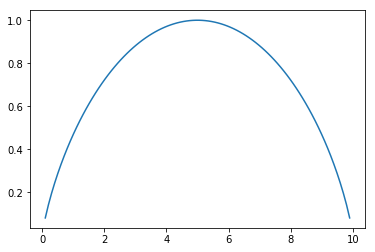

In [9]:
import numpy as np
x=np.linspace(0,10,100)
y=-(x/10)*np.log2(x/10)-((10-x)/10)*np.log2((10-x)/10)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y)